In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:

class HodgkinHuxleyModel:
    def __init__(self):
        self.gNa = 120.0  # Sodium conductance in mS/cm^2
        self.gK = 36.0  # Potassium conductance in mS/cm^2
        self.gL = 0.3  # Leak conductance in mS/cm^2
        self.Cm = 1.0  # Membrane capacitance in µF/cm^2
        self.ENa = 50.0  # Sodium reversal potential in mV
        self.EK = -77.0  # Potassium reversal potential in mV
        self.EL = -54.387  # Leak reversal potential in mV

    def alpha_m(self, V):
        return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

    def beta_m(self, V):
        return 4.0 * np.exp(-(V + 65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65.0) / 20.0)

    def beta_h(self, V):
        return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80.0)

    def I_Na(self, V, m, h):
        return self.gNa * m**3 * h * (V - self.ENa)

    def I_K(self, V, n):
        return self.gK * n**4 * (V - self.EK)

    def I_L(self, V):
        return self.gL * (V - self.EL)

    def dALLdt(self, X, t, I):
        V, m, h, n = X

        dVdt = (I - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.Cm
        dmdt = self.alpha_m(V) * (1.0 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1.0 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1.0 - n) - self.beta_n(V) * n

        return dVdt, dmdt, dhdt, dndt





In [4]:

T = 50  # Total time 
dt = 0.01  # Time step in ms
t = np.arange(0, T, dt)


I = 10  # Input current in µA/cm^2


V0 = -65  # Initial membrane potential in mV
m0 = 0.05  # Initial m value
h0 = 0.6  # Initial h value
n0 = 0.32  # Initial n value
X0 = [V0, m0, h0, n0]

In [5]:
# Create model and run simulation
model = HodgkinHuxleyModel()
X = odeint(model.dALLdt, X0, t, args=(I,))
V = X[:, 0]
m = X[:, 1]
h = X[:, 2]
n = X[:, 3]

# Calculate ionic currents
I_Na = [model.I_Na(V[i], m[i], h[i]) for i in range(len(t))]
I_K = [model.I_K(V[i], n[i]) for i in range(len(t))]
I_L = [model.I_L(V[i]) for i in range(len(t))]

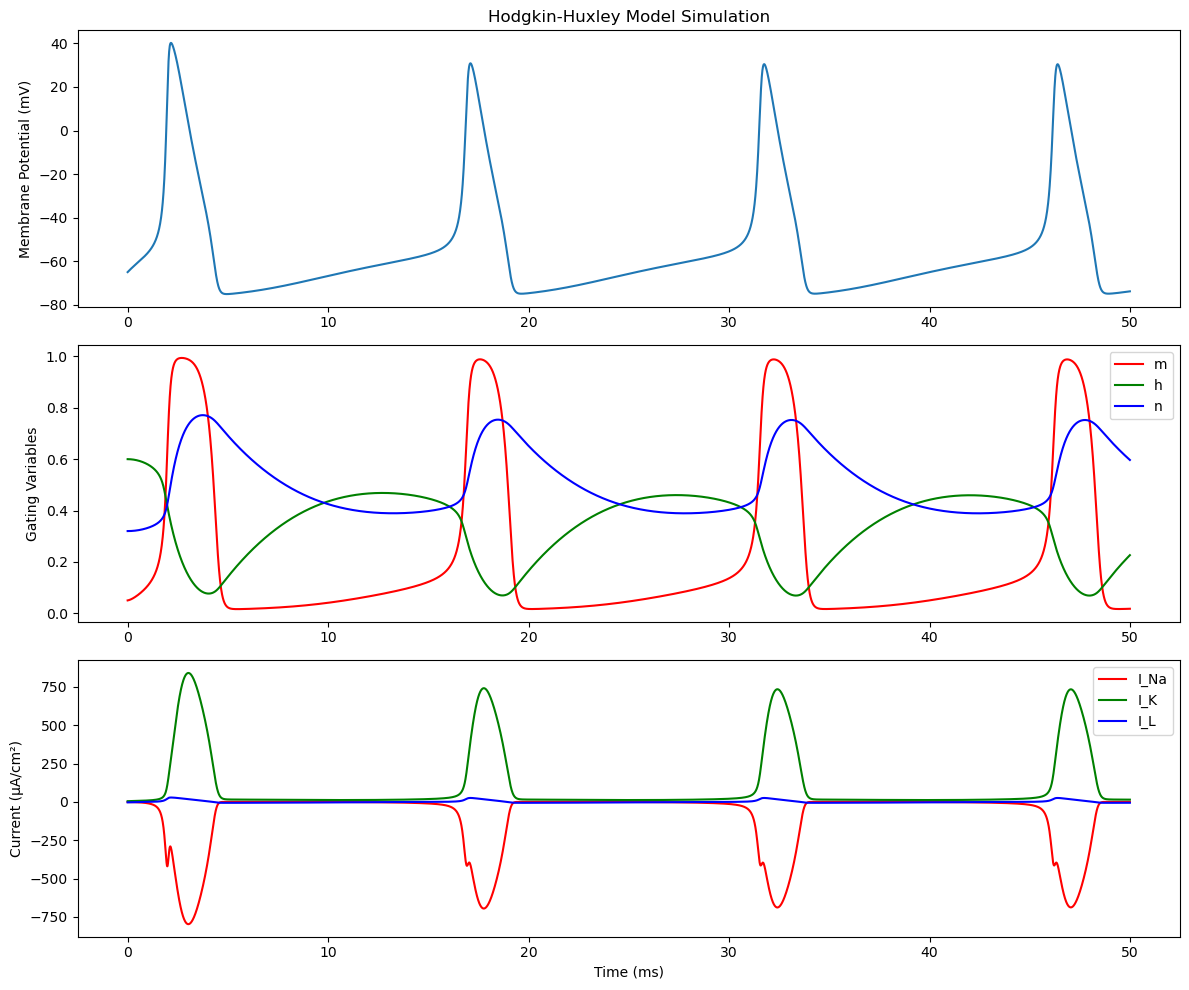

In [6]:
# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t, V)
plt.title('Hodgkin-Huxley Model Simulation')
plt.ylabel('Membrane Potential (mV)')

plt.subplot(3, 1, 2)
plt.plot(t, m, 'r', label='m')
plt.plot(t, h, 'g', label='h')
plt.plot(t, n, 'b', label='n')
plt.ylabel('Gating Variables')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, I_Na, 'r', label='I_Na')
plt.plot(t, I_K, 'g', label='I_K')
plt.plot(t, I_L, 'b', label='I_L')
plt.xlabel('Time (ms)')
plt.ylabel('Current (µA/cm²)')
plt.legend()

plt.tight_layout()
plt.show()